#Numpy
Numpy gjør at vi kan ta i bruk multi-deminsional arrays og mattematiske funksjoner som lett lar oss gjennomføre lineær algebra kalkulasjoner. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Finner gjennomsnittelig avkasting på et portfolio
stock_list = [2.6, 1.2, 3.3, 8, 4.1] #liste
#Vi lager et numpy array på følgende måte:
returns = np.array(stock_list)
print("Returns: {0}, and is of type {1}".format(returns, type(returns)))

Returns: [2.6 1.2 3.3 8.  4.1], and is of type <class 'numpy.ndarray'>


In [3]:
returns

array([2.6, 1.2, 3.3, 8. , 4.1])

In [4]:
#2-dimensjonalt array
two_d = np.array([[1,2], [3,4]])
print(two_d)

[[1 2]
 [3 4]]


In [5]:
#Shape ghir oss dimensjonene på arrayet
print(two_d.shape)

(2, 2)


In [6]:
#Man er i stand til å slice arrayene på vanlig måte
print(returns[1:3])
print("_______")
print(two_d)
print(two_d[:, 0]) #første kolonne
print(two_d[0,:]) #første rad

[1.2 3.3]
_______
[[1 2]
 [3 4]]
[1 3]
[1 2]


In [7]:
#Numpy har også en rekke array funksjoner.
print(returns)
print("Log:", np.log(returns)) #Log all numbers
print("Mean:", np.mean(returns))
print("Max:", np.max(returns))


[2.6 1.2 3.3 8.  4.1]
Log: [0.95551145 0.18232156 1.19392247 2.07944154 1.41098697]
Mean: 3.84
Max: 8.0


In [8]:
#kan også modifisere arrayene ganske fort
returns2 = returns*10
print(returns)
print(returns2)

[2.6 1.2 3.3 8.  4.1]
[26. 12. 33. 80. 41.]


In [9]:
def devide3(arr):
  return arr/3

test1 = devide3(returns2)
print(test1)

[ 8.66666667  4.         11.         26.66666667 13.66666667]


Text(0, 0.5, 'Returns')

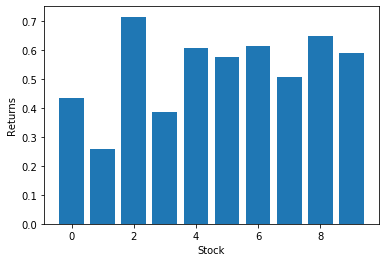

In [17]:
#La oss nå simulere et aksjemarked.
#Vi starter med å opprette en array som holder aktivaene og avkastningene.
#Disse skal vi bruke til å bygge et portefølje 

#Vi lager et numpy array med dimensjonene 10 x 100 med bare 0
assets = np.zeros((10, 100))
returns = np.zeros((10,100))

#Fyller første rad
R_1 = np.random.normal(1.01, 0.03, 100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)

#Fyller følgende rader med vardier som er korrelert med rad 1 R_1
for i in range(1, 10):
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    returns[i] = R_i #De vil være korrelert fordi de har noen underliggende informasjon som vil være delt.
    assets[i] = np.cumprod(R_i)
    
mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]

#Vi plotter avkastningen til de aksjene vi har laget.
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
